In [1]:
# We give an example of how to find the optimal portfolio with n>1 risky asset and 1 risk-free asset
# We use the 5 industry port from http://mba.tuck.dartmouth.edu/pages/faculty/ken .french/data_library.html


import pandas as pd # To load data, we use the package pandas
import numpy as np # To do mathematical operations, we use the package numpy
import matplotlib.pyplot as plt # To plot the returns data, we use the package matplotlib
%matplotlib inline

# Load the monthly data

factornames1 = ['time', 'mktrf', 'var3', 'var4', 'rf'] # Give variables' names
factornames2 = ['time', 'factor1', 'factor2', 'factor3', 'factor4', 'factor5'] # Give variables' names
df1 = pd.read_fwf('Factors_July26_July11.dat', colspecs='infer', widths=None, header=None, names=factornames1)
df2 = pd.read_fwf('Indu5_July26_July11.dat', colspecs='infer', widths=None, header=None, names=factornames2)

df = df1.combine_first(df2)
df = df[:-1]
df['time'] = df['time'].astype(int)

df['factor1rf'] = df['factor1']- df['rf']
df['factor2rf'] = df['factor2']- df['rf']
df['factor3rf'] = df['factor3']- df['rf']
df['factor4rf'] = df['factor4']- df['rf']
df['factor5rf'] = df['factor5']- df['rf']

df = df.drop(['var3','var4'], 1)

# The returns from the data are in percentage points

indu_names = ['factor1rf','factor2rf','factor3rf','factor4rf','factor5rf']
mktrf = df['mktrf']/100
rf = df['rf']/100
ReEx = df[indu_names]/100

T = len(df) # The number of obs

gamma = 3 # The risk-averse coeff.

# estimate the mean and covariance matrix of the 5 excess return

mu=ReEx.mean() 
V=ReEx.cov()

# Computing the optimal weights on the 5 risky aasets

w = 1/gamma*np.matmul(np.linalg.inv(V), mu)

Port = [] # A list to store the returns on the portfolio
CC_Port = [] # to store the accumulative returns

Port.append(rf[0] + np.matmul(ReEx.iloc[0],w)) # return in the first period

CC_Port.append(1+Port[0])

for i in range(T-1):
    Port.append(rf[i+1] + np.matmul(ReEx.iloc[i+1],w));
    CC_Port.append(CC_Port[i]*(1+Port[i+1]))

ExPort = Port - rf # excess return of the optimal portfolio
muP = ExPort.mean()
sig2P = ExPort.var()
sigP = np.sqrt(sig2P)
SharpeP = muP/sigP


# Compute Sharpe Ratio and the accumulative return on the mkt

mu1 = mktrf.mean()              # estimate the mean and variance of the mkt excess return   
sig2 = mktrf.var()
sig = np.sqrt(sig2)
SharpeRM = mu1/sig     # Sharpe ratio of the mkt

# mkt return, obtained by adding back the riskfree rate

CC_mkt = []
CC_mkt.append(1+mktrf[0] + rf[0])

for i in range(T-1):
    CC_mkt.append(CC_mkt[i]*(1 + mktrf[i+1] + rf[i+1]))   

In [2]:
print('risk aevrsion\n')
print('{0:.4f}\n '.format(gamma))

risk aevrsion

3.0000
 


In [3]:
print('weights on the risky assets\n')
print(w)

weights on the risky assets

[ 0.69542253  0.6604779   0.05889521  0.54013127 -0.93355514]


In [4]:
print('weights on the riskfree asset')
print(1-w.sum())

weights on the riskfree asset
-0.0213717714648


In [5]:
print('Excesss Mean, std and Sharpe ratios of the mkt and the optimal portfolio\n')
print('        {0:.4f}   {1:.4f}  {2:.4f}\n '.format(mu1, sig, SharpeRM))
print('        {0:.4f}   {1:.4f}  {2:.4f}\n '.format(muP, sigP, SharpeP))

Excesss Mean, std and Sharpe ratios of the mkt and the optimal portfolio

        0.0062   0.0545  0.1144
 
        0.0084   0.0528  0.1584
 


In [6]:
print('max, min return of  mkt  and the optimal port\n')
print('        {0:.4f}   {1:.4f}\n '.format(max(mktrf), min(mktrf)))
print('        {0:.4f}   {1:.4f}\n '.format(max(Port), min(Port)))

max, min return of  mkt  and the optimal port

        0.3827   -0.2904
 
        0.5141   -0.3253
 


In [7]:
print('Accu return of mkt, and the optimal port\n')
print('        {0:.4f}   {1:.4f}\n '.format(CC_mkt[T-1], CC_Port[T-1]))

Accu return of mkt, and the optimal port

        2540.3984   24082.9287
 


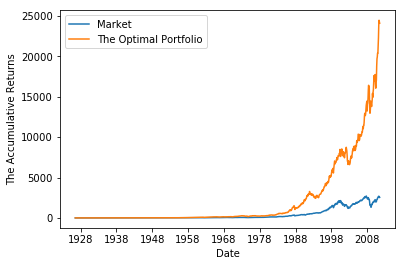

In [8]:
# Plot the accu returns

df.time = pd.to_datetime(df['time'], format='%Y%m')
df.set_index(['time'],inplace=True)

plt.plot(df.index, CC_mkt)
plt.plot(df.index, CC_Port)
plt.ylabel('The Accumulative Returns')
plt.xlabel('Date')
plt.legend(['Market', 'The Optimal Portfolio'], loc='upper left')
plt.show()